# Análise de *outliers*

In [ ]:
import numpy as np
import pandas as pd
#import io
#from google.colab import files

## Identificação *outliers*

In [ ]:
#uploaded = files.upload()

In [ ]:
# dados_credito = pd.read_csv(io.StringIO(uploaded['dados_credito_small.csv'].decode('utf-8')),
#                             sep=',', decimal='.')

In [ ]:
dados_credito = pd.read_csv('dados_credito_small.csv', sep=',', decimal='.')

FileNotFoundError: [Errno 2] No such file or directory: 'dados_credito_small.csv'

In [ ]:
dados_credito

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,idade_z,outras_div_z,outras_div_log,renda_log,outras_div_cat
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]",0.800922,0.597431,1.611436,5.170484,alta
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]",-0.980602,0.293641,1.386294,3.433987,alta
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]",0.673671,-0.256789,0.774727,4.007333,media-alta
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]",0.800922,-0.662845,-0.198451,4.787492,baixa
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]",-1.362357,0.010906,1.118415,3.332205,media-alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,47,2,4,33,7.1,1.15,nao_pagou,ensin_medio,acima_40,"(24,34]",1.564433,-0.563587,0.139762,3.496508,baixa-media
496,497,30,2,12,98,7.2,4.12,pagou,ensin_medio,abaixo_30,"(54,446]",-0.598847,0.329735,1.415853,4.584967,alta
497,498,44,2,12,86,13.0,9.70,pagou,ensin_medio,acima_40,"(54,446]",1.182678,2.008097,2.272126,4.454347,alta
498,499,25,1,0,18,18.9,2.89,nao_pagou,ensin_basico,abaixo_30,"[14,24]",-1.235105,-0.040227,1.061257,2.890372,media-alta


In [ ]:
dados_credito.shape

(500, 16)

### Método *Score-z*

In [ ]:
dados_credito['idade_z'] = (dados_credito['idade'] - dados_credito['idade'].mean()) / dados_credito['idade'].std()

In [ ]:
dados_credito['outras_div_z'] = (dados_credito['outras_div'] - dados_credito['outras_div'].mean()) / dados_credito['outras_div'].std()

In [ ]:
dados_credito[['idade', 'idade_z']].head()

,idade,idade_z
0,41,0.800922
1,27,-0.980602
2,40,0.673671
3,41,0.800922
4,24,-1.362357


In [ ]:
dados_credito[['outras_div_z', 'outras_div']].head()

,outras_div_z,outras_div
0,0.597431,5.01
1,0.293641,4.00
2,-0.256789,2.17
3,-0.662845,0.82
4,0.010906,3.06


In [ ]:
dados_credito[['idade', 'idade_z']].describe()

,idade,idade_z
count,500.00000,5.000000e+02
mean,34.70600,-3.872458e-16
std,7.85844,1.000000e+00
min,20.00000,-1.871364e+00
25%,29.00000,-7.260983e-01
50%,34.00000,-8.983972e-02
75%,40.00000,6.736706e-01
max,56.00000,2.709698e+00


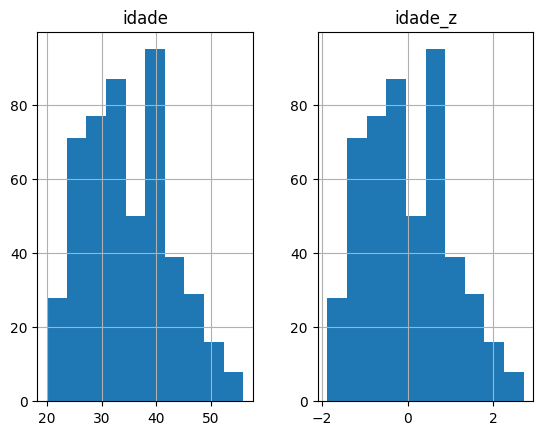

In [ ]:
dados_credito[['idade', 'idade_z']].hist();

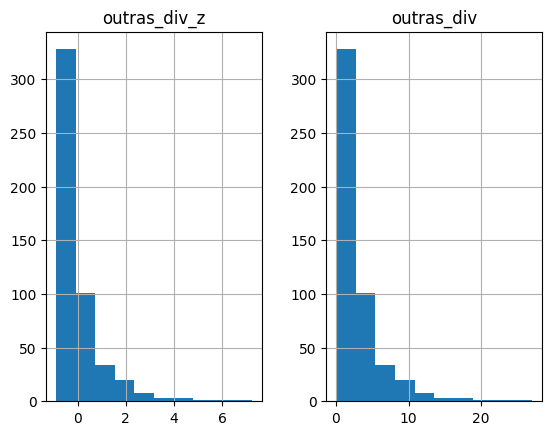

In [ ]:
dados_credito[['outras_div_z', 'outras_div']].hist();

In [ ]:
dados_credito.sort_values('idade_z', ascending = False)

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,idade_z,outras_div_z
445,446,56,1,11,59,15.0,4.18,pagou,ensin_basico,acima_40,"(54,446]",2.709698,0.347782
189,190,55,1,20,78,15.6,7.76,pagou,ensin_basico,acima_40,"(54,446]",2.582446,1.424581
231,232,55,1,3,40,8.0,2.64,nao_pagou,ensin_basico,acima_40,"(34,54]",2.582446,-0.115422
243,244,54,3,22,118,14.4,7.39,pagou,ensin_sup,acima_40,"(54,446]",2.455195,1.313291
325,326,54,1,25,119,26.5,17.20,nao_pagou,ensin_basico,acima_40,"(54,446]",2.455195,4.263960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,21,3,0,24,7.7,1.01,pagou,ensin_sup,abaixo_30,"[14,24]",-1.744112,-0.605696
359,360,21,3,0,26,7.7,0.47,pagou,ensin_sup,abaixo_30,"(24,34]",-1.744112,-0.768118
45,46,21,2,0,16,6.8,0.94,pagou,ensin_medio,abaixo_30,"[14,24]",-1.744112,-0.626751
24,25,21,2,1,16,18.0,2.64,nao_pagou,ensin_medio,abaixo_30,"[14,24]",-1.744112,-0.115422


In [ ]:
dados_credito.sort_values('outras_div_z', ascending = False)

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,idade_z,outras_div_z
343,344,40,3,5,220,16.0,27.03,nao_pagou,ensin_sup,entre_30_40,"(54,446]",0.673671,7.220645
466,467,47,3,16,221,17.6,23.10,nao_pagou,ensin_sup,acima_40,"(54,446]",1.564433,6.038572
491,492,41,3,13,91,25.2,20.62,nao_pagou,ensin_sup,acima_40,"(54,446]",0.800922,5.292634
478,479,51,2,27,166,11.5,18.27,pagou,ensin_medio,acima_40,"(54,446]",2.073440,4.585797
325,326,54,1,25,119,26.5,17.20,nao_pagou,ensin_basico,acima_40,"(54,446]",2.455195,4.263960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,25,1,9,18,1.2,0.15,pagou,ensin_basico,abaixo_30,"[14,24]",-1.235105,-0.864369
271,272,22,1,4,16,1.2,0.11,pagou,ensin_basico,abaixo_30,"[14,24]",-1.616860,-0.876400
76,77,24,1,2,21,0.6,0.10,pagou,ensin_basico,abaixo_30,"[14,24]",-1.362357,-0.879408
10,11,27,1,0,16,1.7,0.09,pagou,ensin_basico,abaixo_30,"[14,24]",-0.980602,-0.882415


### Método *Box-Plot*

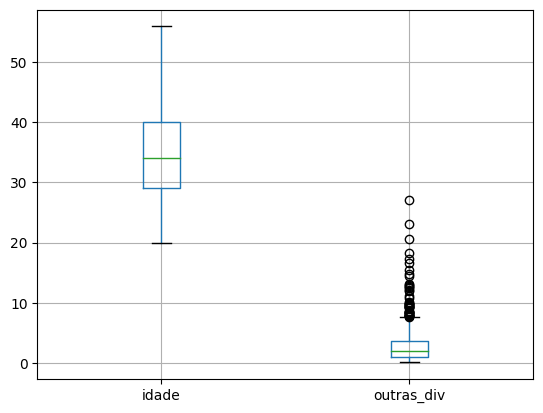

In [ ]:
dados_credito[['idade', 'outras_div']].boxplot();

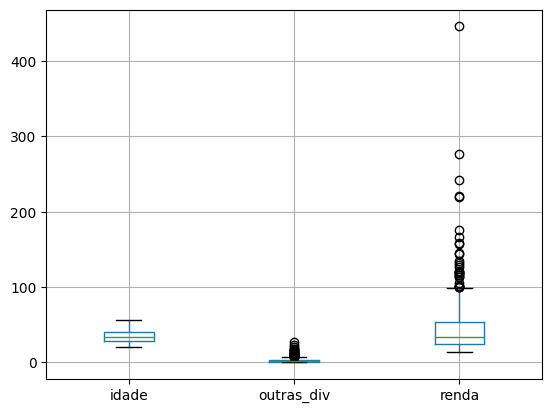

In [ ]:
dados_credito[['idade', 'outras_div', 'renda']].boxplot();

In [ ]:
dados_credito['outras_div_log'] = np.log(dados_credito['outras_div'])
dados_credito['renda_log'] = np.log(dados_credito['renda'])

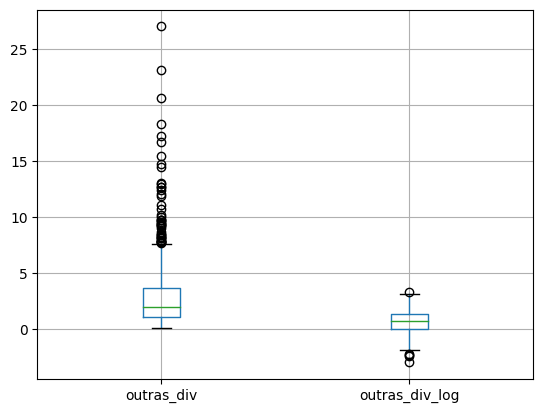

In [ ]:
dados_credito[['outras_div', 'outras_div_log']].boxplot();

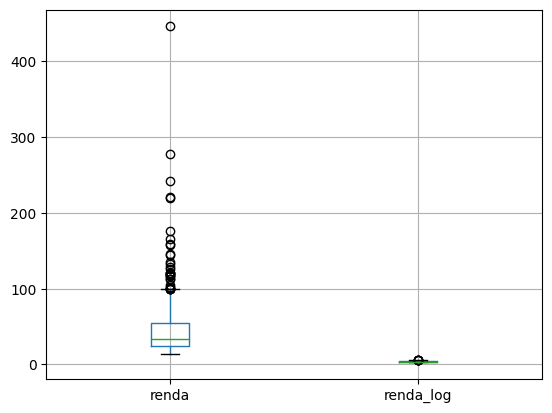

In [ ]:
dados_credito[['renda', 'renda_log']].boxplot();

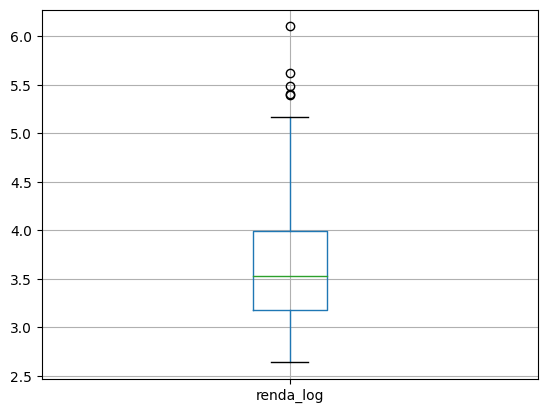

In [ ]:
dados_credito[['renda_log']].boxplot();

In [ ]:
dados_credito[dados_credito['renda_log'] > 5]

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,idade_z,outras_div_z,outras_div_log,renda_log
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]",0.800922,0.597431,1.611436,5.170484
292,293,51,2,19,159,2.8,3.38,pagou,ensin_medio,acima_40,"(54,446]",2.073440,0.107157,1.217876,5.068904
343,344,40,3,5,220,16.0,27.03,nao_pagou,ensin_sup,entre_30_40,"(54,446]",0.673671,7.220645,3.296947,5.393628
437,438,40,3,18,157,6.6,7.04,pagou,ensin_sup,entre_30_40,"(54,446]",0.673671,1.208018,1.951608,5.056246
444,445,43,4,18,446,6.5,12.96,nao_pagou,ensin_sup,acima_40,"(54,446]",1.055426,2.988646,2.561868,6.100319
450,451,43,1,25,242,2.6,4.66,pagou,ensin_basico,acima_40,"(54,446]",1.055426,0.492157,1.539015,5.488938
456,457,37,5,9,277,5.9,9.56,pagou,ensin_sup,entre_30_40,"(54,446]",0.291915,1.965988,2.257588,5.624018
466,467,47,3,16,221,17.6,23.10,nao_pagou,ensin_sup,acima_40,"(54,446]",1.564433,6.038572,3.139833,5.398163
478,479,51,2,27,166,11.5,18.27,pagou,ensin_medio,acima_40,"(54,446]",2.073440,4.585797,2.905260,5.111988


### Gráfico de dispersão

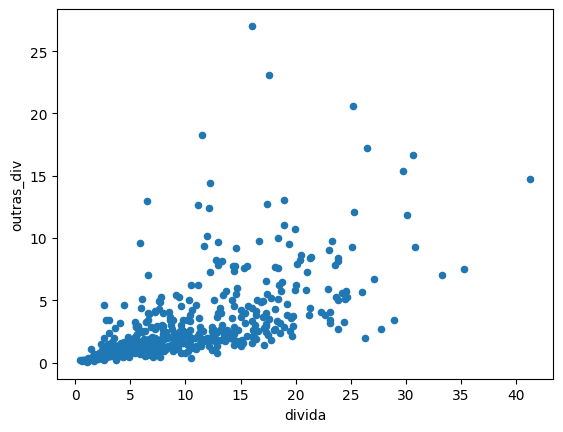

In [ ]:
dados_credito.plot.scatter(x = 'divida', y = 'outras_div');

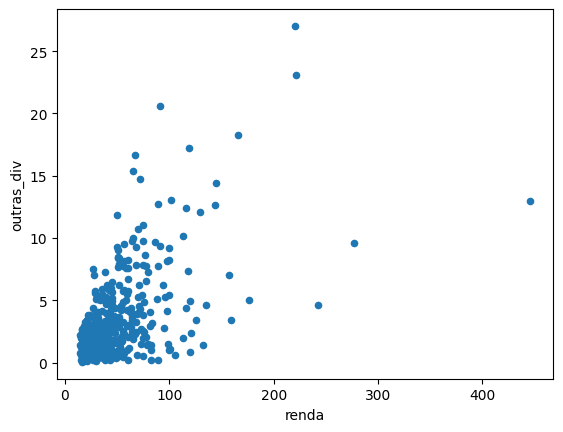

In [ ]:
dados_credito.plot.scatter(x = 'renda', y = 'outras_div');

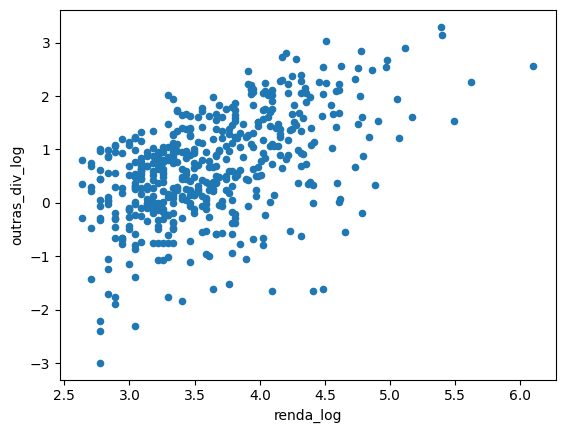

In [ ]:
dados_credito.plot.scatter(x = 'renda_log', y = 'outras_div_log');

## Tratamento *outliers*

### Categorizar variável

In [ ]:
dados_credito['outras_div_cat'] = pd.qcut(dados_credito['outras_div'],
                                          q = 4,
                                          labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])

In [ ]:
dados_credito[['id', 'idade', 'outras_div', 'outras_div_cat']].head()

,id,idade,outras_div,outras_div_cat
0,1,41,5.01,alta
1,2,27,4.00,alta
2,3,40,2.17,media-alta
3,4,41,0.82,baixa
4,5,24,3.06,media-alta
